# LAB 5. Spacy Pipeline and LSTM FOR TEXT CLASSIFICATION & SENTIMENT ANALYSIS

## SpaCy’s processing pipeline

### 1. Load the pipeline and the en_core_web_md modules

In [1]:
pip install spacy

In [2]:
#Load the pipeline and the en_core_web_md modules
import spacy

spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")



✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


### 2. Show the components considered in the pipeline

In [3]:
#Show the components considered in the pipeline
print(nlp.pipe_names)

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


### 3. Load the SA dataset from Campus Virtual

In [4]:
#Load the SA dataset from Campus Virtual
import pandas as pd

sadataset = pd.read_csv("./SA_dataset.csv")

In [5]:
sadataset.head()

,Review,Rating,Sentiment
0,**Possible Spoilers**,1,0
1,"Read the book, forget the movie!",2,0
2,**Possible Spoilers Ahead**,2,0
3,"What a script, what a story, what a mess!",2,0
4,I hope this group of film-makers never re-unites.,1,0


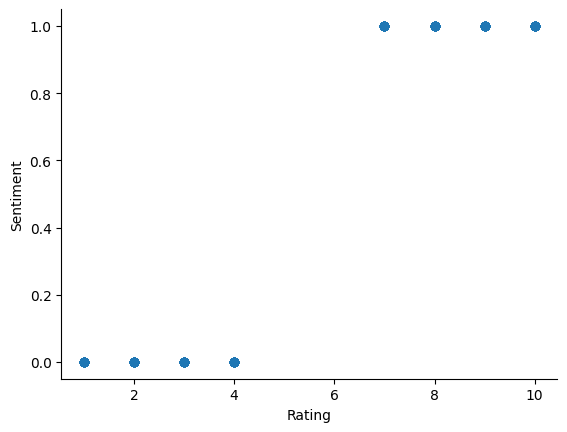

In [50]:
# @title Rating vs Sentiment

from matplotlib import pyplot as plt
sadataset.plot(kind='scatter', x='Rating', y='Sentiment', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

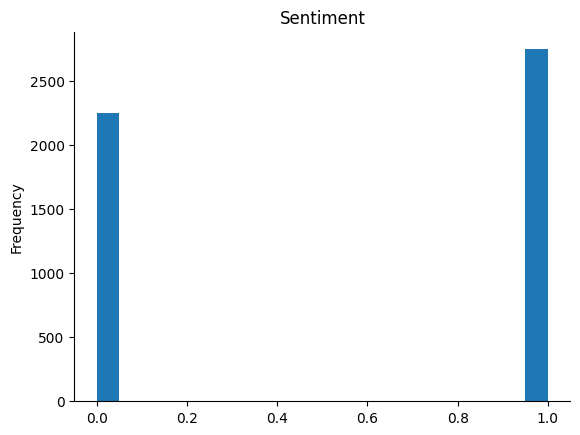

In [49]:
# @title Sentiment

from matplotlib import pyplot as plt
sadataset['Sentiment'].plot(kind='hist', bins=20, title='Sentiment')
plt.gca().spines[['top', 'right',]].set_visible(False)

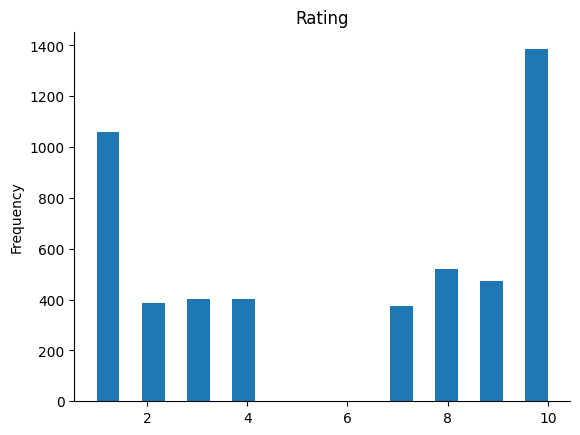

In [48]:
# @title Rating

from matplotlib import pyplot as plt
sadataset['Rating'].plot(kind='hist', bins=20, title='Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

### 4. Explore the dataset to describe it

In [6]:
#Explore the dataset to describe it
print(sadataset.describe())


            Rating    Sentiment
count  5000.000000  5000.000000
mean      5.902200     0.550000
std       3.653944     0.497543
min       1.000000     0.000000
25%       2.000000     0.000000
50%       7.000000     1.000000
75%      10.000000     1.000000
max      10.000000     1.000000


In [7]:
#Get rating distribution
rating_distribution = sadataset['Rating'].value_counts()
print(rating_distribution)

#Now print it in percentages
rating_distribution = sadataset['Rating'].value_counts(normalize=True)
print(rating_distribution)

10    1385
1     1061
8      520
9      472
3      401
4      401
2      387
7      373
Name: Rating, dtype: int64
10    0.2770
1     0.2122
8     0.1040
9     0.0944
3     0.0802
4     0.0802
2     0.0774
7     0.0746
Name: Rating, dtype: float64


### 5. Add the text categorizer component (using a multilabel model) to the pipeline

In [8]:
# Add the text categorizer component (using a multilabel model) to the pipeline
textcat= nlp.add_pipe("textcat")

print(nlp.pipe_names)

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner', 'textcat']


### 6. Add two labels: positive and negative sentiments

In [9]:
#Add two labels: positive and negative sentiments
nlp.get_pipe("textcat").add_label("positive")
nlp.get_pipe("textcat").add_label("negative")


1

### 7. Create the comments’ samples

In [10]:
sadataset.tail()

,Review,Rating,Sentiment
4995,"I have only seen this once--in 1986, at an ""ar...",10,1
4996,"This being my first John Carpenter film, I mus...",9,1
4997,"This is kind of a weird movie, given that Sant...",1,0
4998,"Vic (Richard Dreyfuss) is a mob boss, leaving ...",4,0
4999,"Yup, that's right folks, this is undoubtedly t...",1,0


In [11]:
# Training the model
from sklearn.model_selection import train_test_split

X = sadataset['Review'].values
y = sadataset['Sentiment'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Training the model
from spacy.training import Example

def create_examples(X, y):
    examples = []
    for text, label in zip(X, y):
        examples.append(Example.from_dict(nlp.make_doc(text), {'cats': {'positive': int(label), 'negative': int(not label)}}))
    return examples

train_examples = create_examples(X_train, y_train)
test_examples = create_examples(X_test, y_test)

### 8. Initialize the pipeline

In [13]:
#Spacy's Example class is used to create the training data
from spacy.training.example import Example
inp = Example.from_dict(nlp.make_doc("This is a good product"), {"cats": {"positive": 1, "negative": 0}})
textcat.initialize(lambda: [inp], nlp = nlp)

### 9. Enable the text categorizer component to be trained

### 10. Create an optimizer object (resume_training) to keep weights of existing statistical models

In [14]:
optimizer = nlp.resume_training()
losses = []

### 11. Set 5 training epochs, and loss values

In [15]:

optimizer = nlp.resume_training()
losses = []

dict_values([0.0, 0.0, 0.0, 0.0, 486.10923656552586])
Epoch 1/5: Loss 0.1215
[0.12152730914138146]
dict_values([0.0, 0.0, 0.0, 0.0, 366.3886256609319])
Epoch 2/5: Loss 0.0916
[0.12152730914138146, 0.09159715641523297]
dict_values([0.0, 0.0, 0.0, 0.0, 298.45891806007836])
Epoch 3/5: Loss 0.0746
[0.12152730914138146, 0.09159715641523297, 0.07461472951501959]
dict_values([0.0, 0.0, 0.0, 0.0, 266.9642101036461])
Epoch 4/5: Loss 0.0667
[0.12152730914138146, 0.09159715641523297, 0.07461472951501959, 0.06674105252591153]
dict_values([0.0, 0.0, 0.0, 0.0, 241.90928373474375])
Epoch 5/5: Loss 0.0605
[0.12152730914138146, 0.09159715641523297, 0.07461472951501959, 0.06674105252591153, 0.060477320933685935]


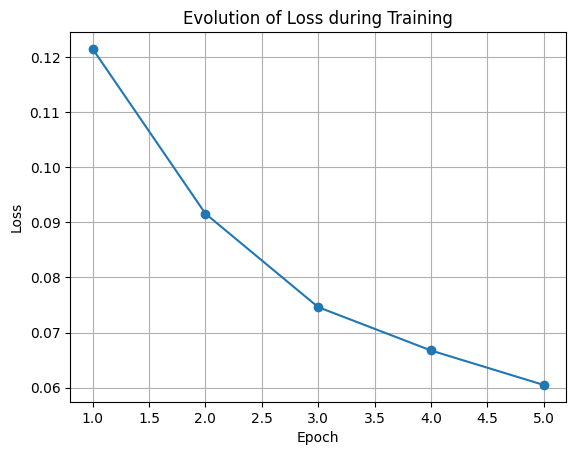

In [16]:
import matplotlib.pyplot as plt
import random
epochs = 5
losses = []
for epoch in range(epochs):
    # Shuffle the training data
    random.shuffle(train_examples)
    # Iterate over batches
    batch_losses = {}
    for batch in spacy.util.minibatch(train_examples, size=2):
        # Update the model with examples
        nlp.update(batch, drop=0.5, losses=batch_losses, sgd=optimizer)

    print(batch_losses.values())
    epoch_loss = sum(batch_losses.values()) / len(train_examples)

    losses.append(epoch_loss)
    print(f"Epoch {epoch + 1}/{epochs}: Loss {epoch_loss:.4f}")
    print(losses)

plt.plot(range(1, epochs + 1), losses, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Evolution of Loss during Training')
plt.grid(True)
plt.show()

### 12. Test new data

In [17]:
#Test new data
test_text = "This movie sucked, you should not see it"

doc = nlp(test_text)
doc.cats

{'positive': 5.951491402811371e-05, 'negative': 0.9999405145645142}

In [18]:
import numpy as np
test_text = "This movie was the best one I have ever seen, i loved it"

doc = nlp(test_text)
doc.cats

{'positive': 0.9998390674591064, 'negative': 0.00016089246491901577}

In [19]:
#Test with misleading data
test_text = "Even this movie won the oscars, you should NOT see it, it is horrendous"

doc = nlp(test_text)
doc.cats

{'positive': 0.13876177370548248, 'negative': 0.8612381815910339}

In [20]:
#Test with misleading data
test_text = "Even this movie won the oscars, you should NOT see it, it is very bad"

doc = nlp(test_text)
doc.cats

{'positive': 0.00041010387940332294, 'negative': 0.9995898604393005}

In [21]:
# Test the model on the test set
y_pred = []

# Number of correct predictions
correct_predictions = 0

for example in test_examples:
    doc = nlp(example.reference.text)

    y_pred = [label for label, score in doc.cats.items() if score > 0.5][0]
    y_true = "positive" if example.reference.cats["positive"] == 1 else "negative"

    correct_predictions += 1 if y_true == y_pred else 0

In [22]:
# Accuracy of the nlp model
print("Accuracy:", correct_predictions / len(test_examples))

Accuracy: 0.846


## Training an LSTM model from PyTorch

### 1- Use same dataset as previous analysis

In [23]:
import pandas as pd

Pytorch_dataset = pd.read_csv("./SA_dataset.csv")

In [24]:
# Training the model
from sklearn.model_selection import train_test_split

X = Pytorch_dataset['Review'].values
y = Pytorch_dataset['Sentiment'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2. Use a tokenizer and pad sequences with a maximum of 50 words per utterance

In [25]:
import nltk

nltk.download('punkt')

# Initialize NLTK sentence tokenizer
sentence_tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

# Tokenize the large text into sentences
train_sentences = []
train_labels = []

for samp, label in zip(X_train, y_train):
    train_samp = sentence_tokenizer.tokenize(samp)
    train_sentences = train_sentences + train_samp
    new_lab = [label] * len(train_samp)
    train_labels = train_labels + new_lab

print("check that both labels and samples have the same length:",len(train_sentences), len(train_labels))
test_sentences = []
test_labels = []

for samp, label in zip(X_test, y_test):
    test_samp = sentence_tokenizer.tokenize(samp)
    test_sentences = test_sentences + sentence_tokenizer.tokenize(samp)
    new_lab = [label] * len(test_samp)
    test_labels = test_labels + new_lab

print("check that both labels and samples have the same length:",len(test_sentences), len(test_labels))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


check that both labels and samples have the same length: 17530 17530
check that both labels and samples have the same length: 4447 4447


In [26]:
import torchtext
import torch
from torchtext.data import get_tokenizer

tokenizer = get_tokenizer("basic_english")
X_train_tokenized = [tokenizer(sentence) for sentence in train_sentences]

tokenizer = get_tokenizer("basic_english")
X_test_tokenized = [tokenizer(sentence) for sentence in test_sentences]


In [27]:
sentence_set = set()

for sent in X_train_tokenized:
    for word in sent:
        sentence_set.add(word)


In [28]:
word_dict = {'<pad>':0,
        '<eos>':1,
        '<unk>':2}

#Create a dictionary with all the words in the vocabulary associated with a value
for i,word in enumerate(sentence_set):
    word_dict[word] = i+3


sentence_set.add('<eos>')
sentence_set.add('<unk>')
sentence_set.add('<pad>')

In [29]:
vocabulary_size = len(sentence_set)
vocabulary_size

17268

In [30]:
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence

class LSTM_data(Dataset):
    def __init__(self, X, y,word_dict,transform=None):
        self.X = X
        self.y = y
        self.word_dict = word_dict

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        idx_seq = []
        padding = torch.zeros(50)
        if len(self.X[idx]) > 50:
            X_ret = self.X[idx][:50]
        else:
            X_ret = self.X[idx]
        #print(X_ret)
        #print(self.X)
        for word in X_ret:
            if word in self.word_dict.keys():
                idx_seq.append(self.word_dict[word])
            else:
                idx_seq.append(self.word_dict['<unk>'])

        idx_seq = torch.tensor(idx_seq)

        length = 50 - len(idx_seq)
        if length != 0:
            padding = torch.zeros(length)
            padded_sequences = torch.cat((idx_seq, padding), dim = 0)
        #padded_sequences = pad_sequence((padding, idx_seq), batch_first=True, padding_value=0)
       # padded_sequences
        else:
            padded_sequences = idx_seq


        y_ret = torch.tensor([self.y[idx]])

        return padded_sequences, y_ret

In [31]:
train_data = LSTM_data(X_train_tokenized, train_labels, word_dict)
test_data = LSTM_data(X_test_tokenized, test_labels, word_dict)

train_loader = DataLoader(train_data, batch_size=64,shuffle=True)
test_loader = DataLoader(test_data, batch_size=64,shuffle=True)

In [32]:
import torch
import torch.nn as nn

In [33]:
# If this cell fails you need to change the runtime of your colab notebook to GPU
# Go to Runtime -> Change Runtime Type and select GPU
assert torch.cuda.is_available(), "GPU is not enabled"

# use gpu if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### Specify a many-to one LSTM architecture

In [34]:
class simple_LSTM(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, vocab_size, tagset_size):
        super(simple_LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.word_embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first = True, bidirectional = True)
        self.hidden2label = nn.Linear(hidden_dim*50*2, 1)
        self.dropout = nn.Dropout(0.4)
        self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU()

    def forward(self, sentence):
        bs,_ = sentence.shape
        sentence = sentence.long()
        embeds = self.word_embeddings(sentence)
        embeds = self.relu(embeds)

        lstm_out, _ = self.lstm(embeds)
        lstm_out = self.relu(lstm_out)
        lstm_out = self.dropout(lstm_out)
        #print("out", lstm_out.shape)
        lstm_out = lstm_out.reshape(bs, -1)
        label_space = self.hidden2label(lstm_out)
        label_space = self.sigmoid(label_space)
        lstm_out = self.dropout(lstm_out)
        return label_space

### Specify a size of 256 in the LSTM’s hidden layer, Define the model, and compile it using ADAM (adaptive moment estimation) as optimizer, binary cross entropy as loss function, and accuracy as metric

In [35]:
from torch.nn import BCEWithLogitsLoss

embedding_dim = 100
hidden_dim = 256
vocab_size = vocabulary_size
target_size = 1
model = simple_LSTM(embedding_dim, hidden_dim, vocab_size, target_size).to(device)

learning_rate = 0.005  # Set the learning rate for the optimizer

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  # Create an Adam optimizer and pass the model parameters to optimize

criterion = torch.nn.BCELoss()

In [36]:
import numpy as np
def compute_accuracy(tensor1, tensor2):
    """
    Compute accuracy between two tensors.

    Args:
    - tensor1: First tensor
    - tensor2: Second tensor

    Returns:
    - Accuracy: Percentage of matching elements between the two tensors
    """
    # Ensure tensors are of the same shape
    if tensor1.shape != tensor2.shape:
        raise ValueError("Tensors must have the same shape for comparison.")

    # Convert tensors to numpy arrays for comparison

    array1 = np.array([round(num) for num in tensor1.cpu().detach().numpy()])
    array2 = tensor2.cpu().detach().numpy()

    # Count the number of matching elements
    num_matching = (array1 == array2).sum()

    # Compute accuracy

    accuracy = num_matching / tensor1.numel()
    #accuracies.append(accuracy)
    return accuracy

def validation(model, test_loader, epoch):
    for sent1, label1 in test_loader:
        sent1 = sent1.to(device)
        label1 = label1.to(device)
        label1 = label1.float()
        with torch.no_grad():

            preds = model(sent1)
            loss = criterion(preds,label1)
    preds = preds.squeeze()
    label1 = label1.squeeze()
    accuracy = compute_accuracy(preds, label1)



    #print('VALIDATION loss at epoch', epoch, "is:", loss.item())
    #print('ACCURACY:', accuracy, '\n')
    return accuracy

### Fit the model using 5 epochs, a batch size of 64 and a validation split of 0.3

In [37]:
epochs = 5
losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(epochs):
    model.train()
    tot_loss = 0

    for sent, label in train_loader:
        sent = sent.to(device)
        label = label.to(device)

        optimizer.zero_grad()

        preds = model(sent)
        #preds = preds.squeeze()
        #label = label.squeeze()
        #print('preds', preds.dtype, label.dtype)

        label = label.float()
        #print(preds.shape, label.shape)


        loss = criterion(preds,label)

        loss.backward()

        optimizer.step()

        tot_loss += loss.item()

    print('TRAIN at epoch', epoch, 'is:', tot_loss, '\n')
    train_accuracy = validation(model, train_loader, epoch)
    print('TRAIN ACCURACY at epoch', epoch, 'is', train_accuracy)
    val_accuracy = validation(model, test_loader, epoch)
    print('VALIDATION ACCURACY at epoch', epoch, 'is', val_accuracy)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    losses.append(tot_loss)


TRAIN at epoch 0 is: 184.50524866580963 

TRAIN ACCURACY at epoch 0 is 0.7068965517241379
VALIDATION ACCURACY at epoch 0 is 0.6451612903225806
TRAIN at epoch 1 is: 137.90564438700676 

TRAIN ACCURACY at epoch 1 is 0.8103448275862069
VALIDATION ACCURACY at epoch 1 is 0.6451612903225806
TRAIN at epoch 2 is: 103.14907525479794 

TRAIN ACCURACY at epoch 2 is 0.9137931034482759
VALIDATION ACCURACY at epoch 2 is 0.6451612903225806
TRAIN at epoch 3 is: 80.1394307166338 

TRAIN ACCURACY at epoch 3 is 0.8793103448275862
VALIDATION ACCURACY at epoch 3 is 0.6774193548387096
TRAIN at epoch 4 is: 61.17956718802452 

TRAIN ACCURACY at epoch 4 is 0.896551724137931
VALIDATION ACCURACY at epoch 4 is 0.6774193548387096


### Show the loss function and the accuracy for both training and validation subsets across epochs

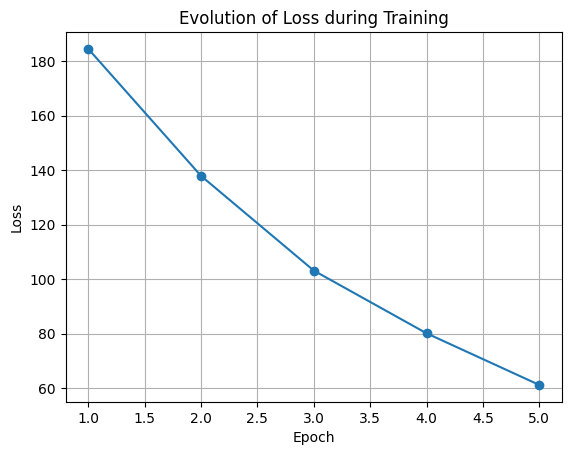

In [38]:
import matplotlib.pyplot as plt
plt.plot(range(1, epochs + 1), losses, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Evolution of Loss during Training')
plt.grid(True)
plt.show()

In [39]:
val_accuracies

[0.6451612903225806,
 0.6451612903225806,
 0.6451612903225806,
 0.6774193548387096,
 0.6774193548387096]

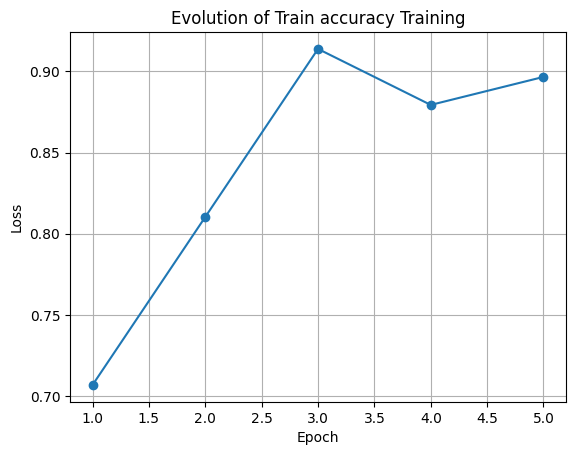

In [40]:
plt.plot(range(1, epochs + 1), train_accuracies, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Evolution of Train accuracy Training')
plt.grid(True)
plt.show()

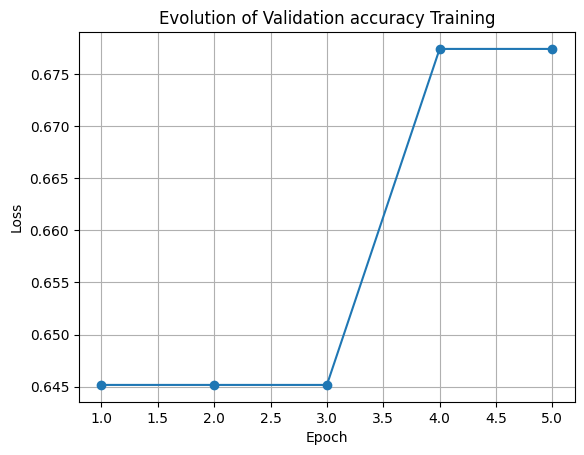

In [41]:
plt.plot(range(1, epochs + 1), val_accuracies, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Evolution of Validation accuracy Training')
plt.grid(True)
plt.show()

### Test the modle with new data

In [42]:
text = "This movie is horrendous, the worst I have seen."
idx_seq = []
#padding = torch.zeros(50)
padded_sequences = torch.tensor([])
for word in text:
    if word in word_dict.keys():
        idx_seq.append(word_dict[word])
    else:
        idx_seq.append(word_dict['<unk>'])

idx_seq = torch.tensor(idx_seq)

length = 50 - len(idx_seq)
if length != 0:
    padding = torch.zeros(length)
    padded_sequences = torch.cat((idx_seq, padding), dim = 0)
#padded_sequences = pad_sequence((padding, idx_seq), batch_first=True, padding_value=0)
# padded_sequences
else:
    padded_sequences = idx_seq

padded_sequences = padded_sequences.unsqueeze(0).to(device)

#y_ret = torch.tensor([self.y[idx]])



In [43]:
padded_sequences.shape

torch.Size([1, 50])

In [44]:
with torch.no_grad():
    pred = model.forward(padded_sequences)
print(pred[0][0])
torch.round(pred[0][0])

tensor(0.9984, device='cuda:0')


tensor(1., device='cuda:0')

In [45]:
text = "This movie is amaizng, you have to see it ."
idx_seq = []
#padding = torch.zeros(50)
padded_sequences = torch.tensor([])
for word in text:
    if word in word_dict.keys():
        idx_seq.append(word_dict[word])
    else:
        idx_seq.append(word_dict['<unk>'])

idx_seq = torch.tensor(idx_seq)

length = 50 - len(idx_seq)
if length != 0:
    padding = torch.zeros(length)
    padded_sequences = torch.cat((idx_seq, padding), dim = 0)
#padded_sequences = pad_sequence((padding, idx_seq), batch_first=True, padding_value=0)
# padded_sequences
else:
    padded_sequences = idx_seq

padded_sequences = padded_sequences.unsqueeze(0).to(device)

#y_ret = torch.tensor([self.y[idx]]

In [46]:
padded_sequences

tensor([[2.0000e+00, 2.9650e+03, 1.4073e+04, 5.6030e+03, 2.0000e+00, 1.2799e+04,
         8.5300e+02, 1.4382e+04, 1.4073e+04, 9.7640e+03, 2.0000e+00, 1.4073e+04,
         5.6030e+03, 2.0000e+00, 1.0326e+04, 1.2799e+04, 1.0326e+04, 1.4073e+04,
         1.6389e+04, 1.1088e+04, 1.0379e+04, 4.5570e+03, 2.0000e+00, 9.9880e+03,
         8.5300e+02, 1.0644e+04, 2.0000e+00, 2.9650e+03, 1.0326e+04, 1.4382e+04,
         9.7640e+03, 2.0000e+00, 1.3662e+04, 8.5300e+02, 2.0000e+00, 5.6030e+03,
         9.7640e+03, 9.7640e+03, 2.0000e+00, 1.4073e+04, 1.3662e+04, 2.0000e+00,
         1.6481e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00]], device='cuda:0')

In [47]:
with torch.no_grad():
    pred = model.forward(padded_sequences)
print(pred[0][0].item())
torch.round(pred[0][0])

0.998218834400177


tensor(1., device='cuda:0')